<div align="center">
    <img src="images/logo_fmkn.png" alt="logo_fmkn" />
</div>

# Машинное обучение

### Лекция 4. CART деревья. Метрические методы классификации и регрессии

<br />
<br />
24 сентября 2021

### Пятиминутка

1. Что такое закономерность?
2. Напишите формулы энтропии и неопределённости Джини для одного аргумента
3. Опишите как работает модель классификации на основе решающего дерева

### Пример решающего дерева (напоминание)

<div align="center">
    <img src="images/tree.jpg" alt="tree" />
</div>


### CART: деревья регрессии и классификации

Обобщение на случай регрессии: $Y = \mathbb{R}, y_v \in \mathbb{R}$

$C(a) = \sum\limits_{i=1}^\ell (a(x_i) - y_i)^2 \to \min\limits_a$

Пусть $U$ — множество объектов $x_i$, дошедших до вершины $v$

Мера неопределённости — среднеквадратичная ошибка

$ \Phi(U) = \min_\limits{y \in Y} \frac{1}{|U|} \sum\limits_{x_i \in U} (y - y_i)^2 $

Значение $y_v$ в терминальной вершине $v$ — MHK-решение:

$y_v = \frac{1}{|U|} \sum\limits_{x_i \in U} y_i$

Дерево регрессии $a(x)$ — это кусочно-постоянная функция.


### Пример. Деревья регрессии различной глубины

Чем сложнее дерево (чем больше его глубина), тем выше влияние шумов в данных и выше риск переобучения.

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

<div align="center">
  <img src="images/sphx_glr_plot_tree_regression_001.png" alt="tree_regression" width=800 />
</div>


### CART: критерий Minimal Cost-Complexity Pruning

Среднеквадратичная ошибка со штрафом за сложность дерева:

$C_\alpha(a) = \sum\limits_{i=1}^\ell (a(x_i) - y_i)^2 + \alpha |V_{\text{лист}}| \to \min\limits_a$

При увеличении $\alpha$ дерево последовательно упрощается. 

Причем последовательность вложенных деревьев единственна.

Из этой последовательности выбирается дерево с минимальной ошибкой на тестовой выборке (Hold-Out).

Для случая классификации используется аналогичная стратегия усечения, только с критерием Джини.





### Вспомогательная задача бинаризации вещественного признака

**Цель**: сократить перебор предикатов вида $[\color{red}{\alpha} \leq f(x) \leq \color{red}{\beta}]$

**Дано**: выборка значений вещественного признака $f(x_i), x_i \in X^\ell$

**Найти**: наилучшее (в каком-то смысле) разбиение области значений признака на относительно небольшое число зон:

$\zeta_0(x) = [f(x) < d_1]$

$\zeta_s(x) = [d_s \leq f(x) < d_{s+1}], s = 1, \dots, r-1$

$\zeta_r(x) = [d_r \leq f(x)]$

<div align="center">
  <img src="images/partition.jpg" alt="partition" width=500 />
</div>


### Способы разбиения области значений признака на зоны

 * Разбиение на равномощные подвыборки (медианное)
 * Разбиение по равномерной сетке «удобных» значений
 * Объединение нескольких разбиений — например, равномерное и медианное
 * Жадная максимизация информативности путём слияний


### Случайный лес (Random Forest)

Голосование деревьев классификации, $Y = \{-1, +1\}$

$a(x) = \text{sign} \left(\frac{1}{T} \sum\limits_{t=1}^T b_t(x) \right)$

Голосование деревьев регрессии, $Y = \mathbb{R}$

$a(x) = \frac{1}{T} \sum\limits_{t=1}^T b_t(x)$

 * каждое дерево $b_t(x)$ обучается по случайной выборке с возвращениями
 * в каждой вершине признак выбирается из случайного подмножества $\sqrt{n}$ признаков ($\lfloor n/3 \rfloor$ для регрессии)
 * признаки и пороги выбираются по критерию Джини
 * усечений (pruning) нет


## Метрические методы классификации и регрессии

### Гипотезы непрерывности и компактности

**Гипотеза непрерывности** (для регрессии):

_близким объектам соответствуют близкие ответы_.

<div align="center">
  <table>
    <tr>
      <td>выполнена:</td>
      <td><img src="images/continue_yes.jpg" alt="c_yes" width=200/></td>
    </tr>
    <tr>
      <td>не выполнена:</td>
      <td>    <img src="images/continue_no.jpg" alt="c_no" width=200/></td>
    </tr>
  </table>        
</div>



**Гипотеза компактности** (для классификации):

_близкие объекты, как правило, лежат в одном классе_.

<div align="center">
  <table>
    <tr>
      <td>выполнена:</td>
      <td><img src="images/compactness_yes.jpg" alt="c_yes" width=200/></td>
    </tr>
    <tr>
      <td>не выполнена:</td>
      <td><img src="images/compactness_no.jpg" alt="c_no" width=200/></td>
    </tr>
  </table>        
</div>


### Пример: задача классификации цветков ириса [Фишер, 1936]

$n = 4$ признака, $|Y| = 3$ класса, длина выборки $\ell = 150$.

Привычная мера близости — евклидова метрика в $\mathbb{R}^2$

<div align="center">
    <img src="images/iris_dataset.jpg" alt="iris_dataset" width="900"/>
</div>

### Формализация понятия "близости"

Евклидова метрика и обобщённая метрика Минковского:

$\rho(x, x_i) = \left( \sum\limits_{j=1}^n |x^j - x_i^j|^2\right)^{1/2}
\ \ \ \ 
\rho(x, x_i) = \left( \sum\limits_{j=1}^n w_j|x^j - x_i^j|^p\right)^{1/p}
$

$x = (x^1, \dots, x^n)$ — вектор признаков объекта $x$,

$x_i = (x_i^1, \dots, x_i^n)$ — вектор признаков объекта $x_i$

$w_1, \dots, w_n$ — веса признаков, которые можно обучать

<div align="center">
    <img src="images/contour_lines.jpg" alt="contour_lines" width="600"/>
</div>


<div class="alert alert-info">
<b>Интересная задача:</b> Найдите наименьшее и наибольшее возможное значение числа $\pi$ (длины окружности радиуса 1/2) в двумерном нормированном пространстве.
</div>

 * Подсказка 1: посмотрите в сторону $L_1$ $L_\infty$ норм
 * Подсказка 2: подумайте о правильных, почти идеальных формах

### Нестандартные метрики на практике

1. **Для строк** — редакторское расстояние Левенштейна

<div align="center">
    <img src="images/levenstein.jpg" alt="levenstein" width="600"/>
</div>

2. **Для сигналов** — энергия сжатий и растяжений

<div align="center">
    <img src="images/alpha_drawing.jpg" alt="alpha_drawing" width="600"/>
</div>

3. Для вероятностных распределений — [метрика Вассерштейна](https://en.wikipedia.org/wiki/Wasserstein_metric)


### Обобщённый метрический классификатор

Для произвольного $x \in X$ отранжируем объекты $x_1, \dots, x_\ell$:

$\rho(x, x^{(1)}) \leq \rho(x, x^{(2)}) \leq \dots \leq \rho(x, x^{(\ell)})$,

$x^{(i)}$ — $i$-й сосед объекта $x$ среди $x_1, \dots, x_\ell$

$y^{(i)}$ — ответ на $i$-м соседе объекта $х$

**Метрический алгоритм классификации**:

$\color{red}{a(x:X^\ell) = \arg\max\limits_{y \in Y}} \underbrace{\color{red}{\sum\limits_{i=1}^\ell [y^{(i)} = y] w(i,x)}}_{\Gamma_y(x)}$

$\color{red}{w(i, x)}$ — вес (степень важности) $i$-го соседа объекта $x$, неотрицателен, не возрастает по $i$

$\Gamma_y(x)$ — оценка близости объекта $x$ к классу $y$

### Метод k ближайших соседей (k nearest neighbors, kNN)

$w(i, x) = [i \leq 1]$ — метод ближайшего соседа

$w(i, x) = [i ≤ k]$ — метод $k$ ближайших соседей

Преимущества:
 * простота реализации (lazy learning)
 * параметр $k$ можно оптимизировать по критерию скользящего контроля (leave-one-out):
 
 $\text{LOO}(k, X^\ell) = \sum\limits_{i=1}^\ell [a(x_i; X^\ell/ \{x_i\}, k) \neq y_i] \to \min\limits_k $
 
Недостатки:
 * неоднозначность классификации при $\Gamma_y(x) = \Gamma_s(x), y \neq s$
 * не учитываются значения расстояний


<div class="alert alert-info">
<b>Вопрос 1:</b> Какой очень существенный, зачастую критический недостаток связан с lazy learning?
</div>

**Ответ**: трудность и затратность применения

### Зависимость LOO от числа соседей

**Пример.** Задача UCI: Iris.

<div align="center">
    <img src="images/LOO_Iris.jpg" alt="LOO_Iris" width="800"/>
</div>

<span style="color:red">— несмещённое число ошибок LOO</span>

<span style="color:blue">— смещённое число ошибок, когда объект учитывается как сосед самого себя</span>


### Метод k взвешенных ближайших соседей

$w(i, x) = [i \leq k] w_i$,

где $w_i$ — вес, зависящий только от номера соседа

**Возможные эвристики**

$w_i = \frac{k+1-i}{k}$ — линейно убывающие веса

$w_i = q^i$ — экспоненциально убывающие веса, $0 < q < 1$

**Замечание**

Возможно, было бы лучше, если бы вес $w(i, x)$ зависел не от порядкового номера соседа $i$, а от расстояния до него $\rho(x, x^{(i)})$


### Метод окна Парзена

$w(i, x) = K \left(\frac{\rho(x, x^{(i)})}{h} \right)$, где $h$ — ширина окна, 

$К(r)$ — ядро, не возрастает и положительно на [0, 1].

Метод парзеновского окна __фиксированной ширины__:

$a(x; X^\ell, \color{red}{h}, K) = \arg\max\limits_{y \in Y} \sum\limits_{i=1}^\ell[y_i = y] K \left(\frac{\rho(x, x_{i})}{\color{red}{h}} \right)$

Метод парзеновского окна __переменной ширины__:

$a(x; X^\ell, \color{red}{k}, K) = \arg\max\limits_{y \in Y} \sum\limits_{i=1}^\ell[y_i = y] K \left(\frac{\rho(x, x_{i})}{\color{red}{\rho(x, x^{(k+1)})}} \right)$

**Оптимизация параметров** — по критерию LOO:
 * выбор ширины окна $h$ или числа соседей $k$
 * выбор ядра $К$


### Парзеновское окно фиксированной ширины $h$

**Пример**: двумерная выборка, два класса $Y = \{-1, +1\}$

$а(х) = \arg\max\limits_{y \in Y} \Gamma_y(x) = \text{sign}(\Gamma_{+1}(x) - \Gamma_{-1}(x))$


<div align="center">
  $h = 0.05$
  <img src="images/parzen_fix.jpg" alt="parzen" width=600 />
</div>

<div align="center">
  $h = 0.2$
  <img src="images/parzen_h02.jpg" alt="parzen" width=600 />
</div>

<div align="center">
  $h = 0.5$
  <img src="images/parzen_h05.jpg" alt="parzen" width=600 />
</div>

<div align="center">
  $h = 1$
  <img src="images/parzen_h1.jpg" alt="parzen" width=600 />
</div>

<div align="center">
  $h = 5$
  <img src="images/parzen_h5.jpg" alt="parzen" width=600 />
</div>

### Метод потенциальных функций

$w(i, x) = \gamma^{(i)} K\left(\frac{\rho(x, x^{(i)}}{h^{(i)}}) \right)$


$a(x; X^\ell) = \arg\max\limits_{y \in Y} \sum\limits_{i=1}^\ell[y_i = y] \gamma_i K \left(\frac{\rho(x, x_{i})}{h_i} \right)$

где $\gamma_i$ — веса объектов, $\gamma_i \geq 0$, $h_i > 0$

**Физическая аналогия** из электростатики:

$\gamma_i$ — величина «заряда» в точке $x_i$

$h_i$ — «радиус действия» потенциала с центром в точке $x_i$

$y_i$ — знак «заряда» (в случае двух классов $Y = \{-1, +1\}$)

$K(r) = \frac{1}{r}$ или $\frac{1}{r+a}$

В задачах классификации нет ограничений ни на $K$, на на $|Y|$


### Метод потенциальных функций — линейный классификатор

Два класса: $Y = \{-1, +1\}$

$a(x, X^\ell) = \arg \max\limits_{y \in Y} \Gamma_y(x) = \text{sign}(\Gamma_{+1}(x) - \Gamma_{-1}(x)) = \\
= \text{sign}\sum\limits_{i=1}^\ell \gamma_i \color{red}{y_i K\left(\frac{\rho(x, x_i)}{h_i} \right)}$

Сравним с линейной моделью классификации:

$a(x) = \text{sign}\sum\limits_{j=1}^n \gamma_j \color{red}{ f_j(x)}$

 * $f_j(x) = y_j K\left(\frac{\rho(x, x_j)}{h_j} \right)$ — новые признаки объекта $x$
 * $\gamma_j$ — веса линейного классификатора
 * $n = \ell$ — число признаков равно числу объектов обучения


### Резюме

 * Метрические классификаторы — одни из самых простых. Качество классификации определяется качеством метрики.
 
 * Что можно обучать:
  - число ближайших соседей $k$ или ширину окна $h$
  - веса объектов
  - набор эталонов (prototype selection)
  - метрику (distance learning, similarity learning)
  - в частности, веса признаков в метрике
  - функцию ядра $К(r)$

### Задачи регрессии и метод наименьших квадратов

* $X$ — объекты (часто $\mathbb{R}^n$); $Y$ — ответы (часто $\mathbb{R}$, реже $\mathbb{R}^m$);

 $X^\ell = (x_i, y_i)_{i=1}^\ell$ — обучающая выборка
 
 $y_i = y(x_i), y: X \to Y$ — неизвестная зависимость
 
 * $a(x) = f(x, \alpha)$ — параметрическая модель зависимости, $\alpha \in \mathbb{R}^p$ — вектор параметров модели

 * Метод наименьших квадратов (МНК):
 $ Q(\alpha, X^\ell) = \sum\limits_{i=1}^\ell w_i(f(x_i, \alpha) - y_i)^2 \to \min\limits_{\alpha}$
 
 где $w_i$ — вес, степень важности $i$-го объекта
 
 * Недостаток:
 
 надо иметь хорошую параметрическую модель $f(x, \alpha)$


### Непараметрическая регрессия, формула Надарая-Ватсона

Приближение константой $f(x, \alpha) = \alpha$ в окрестности $x \in X$:

$Q(\alpha; X^\ell) = \sum\limits_{i=1}^\ell \color{red}{w_i(x)}(\alpha - y_i)^2 \to \min\limits_{\alpha \in \mathbb{R}}$

где $\color{red}{w_i(x)} = K\left(\frac{\rho(x, x_i)}{h} \right)$ — веса объектов $x_i$ относительно $x$.

$К(r)$ — ядро, невозрастающее, ограниченное, гладкое

$h$ — ширина окна сглаживания

**Формула ядерного сглаживания Надарая-Ватсона**

$\alpha_h(x; X^\ell) = \frac{\sum\limits_{i=1}^\ell y_i \color{red}{w_i(x)}}{\sum\limits_{i=1}^\ell \color{red}{w_i(x)}} = 
 \frac{\sum\limits_{i=1}^\ell y_i K\left(\frac{\rho(x, x_i)}{h} \right)}{\sum\limits_{i=1}^\ell K\left(\frac{\rho(x, x_i)}{h} \right)}$

------

I. Anokhin, R. Kail, M. Velikanov, M. Panov, A. Zaytsev and D. Yarotsky «M-Ensembles: Accuracy of Standard Ensembles at the Cost of (Almost) a Single Model», submitted to ICML, 2021

### Часто используемые ядра K(r)

 * $R(r) = 0.5 * [|r| \leq 1]$ — прямоугольное
 * $Т(r) = (1 – |r|) [|r| \leq 1]$ — треугольное
 * $Е(r) = (1 – r^2) [|r| \leq 1]$ — квадратичное (Епанечникова)
 * $Q(r) = (1 – r^2)^2 [|r| \leq 1]$ — квартическое
 * $G(r) = exp(-2 r^2)$ — гауссовское


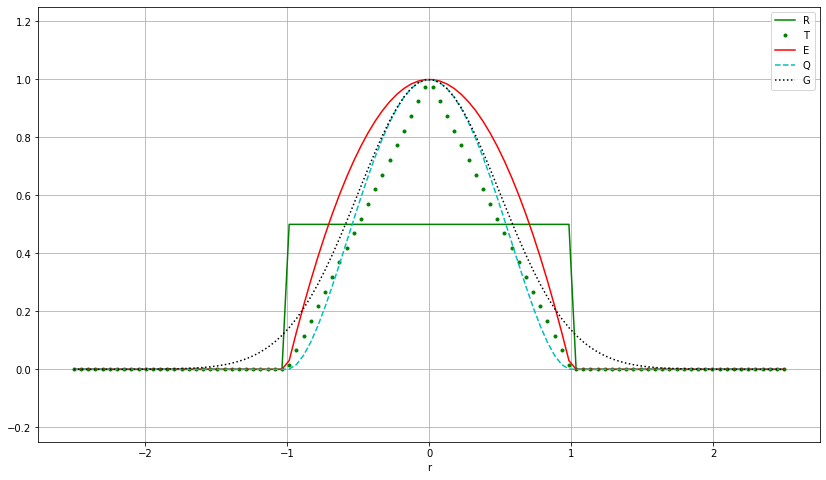

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.set_xlabel('r')

x = np.linspace(-2.5, 2.5, num=100)
x_domain = abs(x) <= 1
R = 0.5 * x_domain
T = (1 - abs(x)) * x_domain
E = (1 - x**2) * x_domain
Q = (1 - x**2)**2 * x_domain
G = np.exp(-2 * x**2)

ax.plot(x, R, 'g', label='R')
ax.plot(x, T, '.g', label='T')
ax.plot(x, E, 'r', label='E')
ax.plot(x, Q, '--c', label='Q')
ax.plot(x, G, 'k:', label='G')

ax.set_ylim(-0.25, 1.25)
ax.grid(True)

fig.set_size_inches(14, 8)
plt.legend(loc='best')
plt.show()

<div class="alert alert-info">
<b>Вопрос 2:</b> Какое ядро выбрать?
</div>

### Выбор ядра K и ширины окна h

$h \in \{\color{red}{0.1}, 1.0, \color{blue}{3.0}\}$, гауссовское ядро $K(r) = exp(-2r^2)$

<div align="center">
  <img src="images/gauss_K_var_h.jpg" alt="gauss_K_var_h" width=800 />
</div>

Гауссовское ядро $\Rightarrow$ гладкая аппроксимация

Ширина окна существенно влияет на точность аппроксимации

### Выбор ядра K и ширины окна h

$h \in \{\color{red}{0.1}, 1.0, \color{blue}{3.0}\}$, треугольное ядро $K(r) = (1 - |r|) [|r| \leq 1]$

<div align="center">
  <img src="images/triangle_K_var_h.jpg" alt="triangle_K_var_h" width=600 />
</div>

Треугольное ядро $\Rightarrow$ кусочно-линейная аппроксимация

Аппроксимация не определена, если в окне нет точек выборки

### Выбор ядра K и ширины окна h

 * Ядро $K(r)$
   - существенно влияет на гладкость функции $a_h(x)$
   - слабо влияет на качество аппроксимации

 * Ширина окна $h$
   - существенно влияет на качество аппроксимации
   
 * Переменная ширина окна по $k$ ближайшим соседям:
 
${w_i(x)} = K\left(\frac{\rho(x, x_i)}{h(x)} \right),\ \ h(x) = \rho(x, x^{(k+1)})$

где $x^{(k)}$ — $k$-й сосед объекта $х$

 * Оптимизация ширины окна по скользящему контролю:

 $\text{LOO}(h, X^\ell) = \sum\limits_{i=1}^\ell (a_h(x_i; X^\ell/ \{x_i\}) - y_i)^2 \to \min\limits_h $


### Проблема выбросов (эксперимент на синтетических данных)

$\ell= 100, h = 1.0$, гауссовское ядро $К(r) = exp(–2r^2)$

<span style="color:red"> Две из 100 точек — выбросы с ординатами $y_i =$ 40 и — 40</span>

<span style="color:blue">Синяя кривая — выбросов нет</span>

<div align="center">
  <img src="images/exp_with_outliers.jpg" alt="exp_with_outliers" width=600 />
</div>


### Проблема выбросов и локально взвешенное сглаживание

**Проблема выбросов**: 

точки с большими случайными ошибками $y_i$ сильно искажают функцию $a_h(x)$

**Основная идея**:

чем больше величина ошибки $\varepsilon_i = |a_h(x_i; X^\ell/\{x_i\}) - y_i|$, тем больше прецедент $(x_i, y_i)$ похож на выброс, тем меньше должен быть его вес $w_i(x)$.

**Эвристика**:

домножить веса $w_i(x)$ на коэффициенты $\gamma_i = \tilde K (\varepsilon_i)$, где $\tilde K$ — ещё одно ядро, вообще говоря, отличное от $К(r)$ 

**Рекомендация**:

квартическое ядро $\tilde K (\varepsilon) = K_Q\left(\frac{\varepsilon}{6\text{med}\{\varepsilon_i\}} \right)$, где $\text{med}\{\varepsilon_i\}$ — медиана вариационного ряда ошибок. 


### Алгоритм LOWESS (LOcally WEighted Scatter plot Smoothing)

**Вход**: $X^\ell$ — обучающая выборка

**Выход**: коэффициенты $\gamma_i, i = 1, \dots, \ell$

----
1: инициализация: $\gamma_i = 1, i = 1, \dots, \ell$

2: **повторять**

3: $\ \ \ $  **для всех** объектов $i = 1, \dots, \ell$

4: $\ \ \ $ $\ \ \ $ вычислить оценки скользящего контроля:

$\ \ \ \ \ \  \ \ \ a_i := a_h(x_i; X^\ell/\{x_i\}) =  
 \frac{\sum\limits_{j=1, j\neq i}^\ell y_i \gamma_j K\left(\frac{\rho(x, x_i)}{h(x_i)} \right)}{\sum\limits_{i=1}^\ell \gamma_j K\left(\frac{\rho(x, x_i)}{h(x_i)} \right)}$

5: $\ \ \ $  **для всех** объектов $i = 1, \dots, \ell$

6: $\gamma_i := \tilde K(|a_i - y_i|)$

7: **пока** коэффициенты $\gamma_i$ не стабилизируются


### Пример работы LОWЕЅЅ на синтетических данных

$l = 100, h = 1.0$, гауссовское ядро $К(r) = exp(–2r^2)$

Две из 100 точек — выбросы с ординатами $y_i$ = 40 и — 40

В данном случае LОWЕЅЅ сходится за несколько итераций:

<div align="center">
  <img src="images/lowess_example.jpg" alt="lowess_example" width=600 />
</div>


### Резюме

 * Непараметрическая регрессия обходится без явного задания параметрической модели зависимости $f(x, \alpha)$

 * Однако неявно модельные предположения закладываются в функцию расстояния $\rho(x, x_i)$ между объектами
 
 * Что можно обучать:
   - число ближайших соседей $k$ или ширину окна $h$
   - веса объектов (обнаруживать выбросы)
   - метрику (distance learning, similarity learning)
   - в частности, веса признаков в метрике

 * Непараметрическая регрессия часто используется как инструмент предварительной обработки данных для сглаживания шумов в данных